In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df = pd.read_csv("../data/raw/dataset.csv")

In [4]:
df.head(5)

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,0gNNToCW3qjabgTyBSjt3H,!Que Vida! - Mono Version,['Love'],220560,11/1/66,1966,0.5250,0.600,0.540,0.00305,0.100,-11.803,0.0328,125.898,0.547,1,9,26,0
1,0tMgFpOrXZR6irEOLNWwJL,"""40""",['U2'],157840,2/28/83,1983,0.2280,0.368,0.480,0.70700,0.159,-11.605,0.0306,150.166,0.338,1,8,21,0
2,2ZywW3VyVx6rrlrX75n3JB,"""40"" - Live",['U2'],226200,8/20/83,1983,0.0998,0.272,0.684,0.01450,0.946,-9.728,0.0505,143.079,0.279,1,8,41,0
3,6DdWA7D1o5TU2kXWyCLcch,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,37,0
4,3vMmwsAiLDCfyc1jl76lQE,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,35,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169907 entries, 0 to 169906
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                169907 non-null  object 
 1   name              169907 non-null  object 
 2   artists           169907 non-null  object 
 3   duration_ms       169907 non-null  int64  
 4   release_date      169907 non-null  object 
 5   year              169907 non-null  int64  
 6   acousticness      169907 non-null  float64
 7   danceability      169907 non-null  float64
 8   energy            169907 non-null  float64
 9   instrumentalness  169907 non-null  float64
 10  liveness          169907 non-null  float64
 11  loudness          169907 non-null  float64
 12  speechiness       169907 non-null  float64
 13  tempo             169907 non-null  float64
 14  valence           169907 non-null  float64
 15  mode              169907 non-null  int64  
 16  key               16

In [5]:
df.describe()

,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
count,1.699070e+05,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000
mean,2.314071e+05,1977.223234,0.493217,0.538147,0.488591,0.161939,0.206692,-11.370311,0.094058,116.947850,0.532091,0.708552,5.200498,31.556681,0.084864
std,1.213223e+05,25.593318,0.376628,0.175345,0.267391,0.309330,0.176797,5.666795,0.149938,30.727079,0.262407,0.454431,3.515272,21.582730,0.278680
min,5.108000e+03,1921.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.710400e+05,1957.000000,0.094500,0.417000,0.263000,0.000000,0.098400,-14.470000,0.034900,93.516000,0.322000,0.000000,2.000000,12.000000,0.000000
50%,2.086000e+05,1978.000000,0.492000,0.548000,0.481000,0.000204,0.135000,-10.474000,0.045000,114.777000,0.544000,1.000000,5.000000,33.000000,0.000000
75%,2.629665e+05,1999.000000,0.888000,0.667000,0.710000,0.086800,0.263000,-7.118000,0.075400,135.712000,0.749000,1.000000,8.000000,48.000000,0.000000
max,5.403500e+06,2020.000000,0.996000,0.988000,1.000000,1.000000,1.000000,3.855000,0.969000,244.091000,1.000000,1.000000,11.000000,100.000000,1.000000


#### Variable objetivo

Extraemos la variable objetivo, la década, ya que no está implícitamente creada en el dataset.

In [5]:
df['decade'] = (df['year'] // 10) * 10

In [6]:
print(df[['year', 'decade']].head(10))

   year  decade
0  1966    1960
1  1983    1980
2  1983    1980
3  1983    1980
4  1983    1980
5  2012    2010
6  1966    1960
7  1961    1960
8  1946    1940
9  1952    1950


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169907 entries, 0 to 169906
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                169907 non-null  object 
 1   name              169907 non-null  object 
 2   artists           169907 non-null  object 
 3   duration_ms       169907 non-null  int64  
 4   release_date      169907 non-null  object 
 5   year              169907 non-null  int64  
 6   acousticness      169907 non-null  float64
 7   danceability      169907 non-null  float64
 8   energy            169907 non-null  float64
 9   instrumentalness  169907 non-null  float64
 10  liveness          169907 non-null  float64
 11  loudness          169907 non-null  float64
 12  speechiness       169907 non-null  float64
 13  tempo             169907 non-null  float64
 14  valence           169907 non-null  float64
 15  mode              169907 non-null  int64  
 16  key               16

In [9]:
df.describe()

,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,decade
count,1.699070e+05,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000
mean,2.314071e+05,1977.223234,0.493217,0.538147,0.488591,0.161939,0.206692,-11.370311,0.094058,116.947850,0.532091,0.708552,5.200498,31.556681,0.084864,1972.695004
std,1.213223e+05,25.593318,0.376628,0.175345,0.267391,0.309330,0.176797,5.666795,0.149938,30.727079,0.262407,0.454431,3.515272,21.582730,0.278680,25.649952
min,5.108000e+03,1921.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,1.710400e+05,1957.000000,0.094500,0.417000,0.263000,0.000000,0.098400,-14.470000,0.034900,93.516000,0.322000,0.000000,2.000000,12.000000,0.000000,1950.000000
50%,2.086000e+05,1978.000000,0.492000,0.548000,0.481000,0.000204,0.135000,-10.474000,0.045000,114.777000,0.544000,1.000000,5.000000,33.000000,0.000000,1970.000000
75%,2.629665e+05,1999.000000,0.888000,0.667000,0.710000,0.086800,0.263000,-7.118000,0.075400,135.712000,0.749000,1.000000,8.000000,48.000000,0.000000,1990.000000
max,5.403500e+06,2020.000000,0.996000,0.988000,1.000000,1.000000,1.000000,3.855000,0.969000,244.091000,1.000000,1.000000,11.000000,100.000000,1.000000,2020.000000


Exploramos la distribución de la variable objetivo

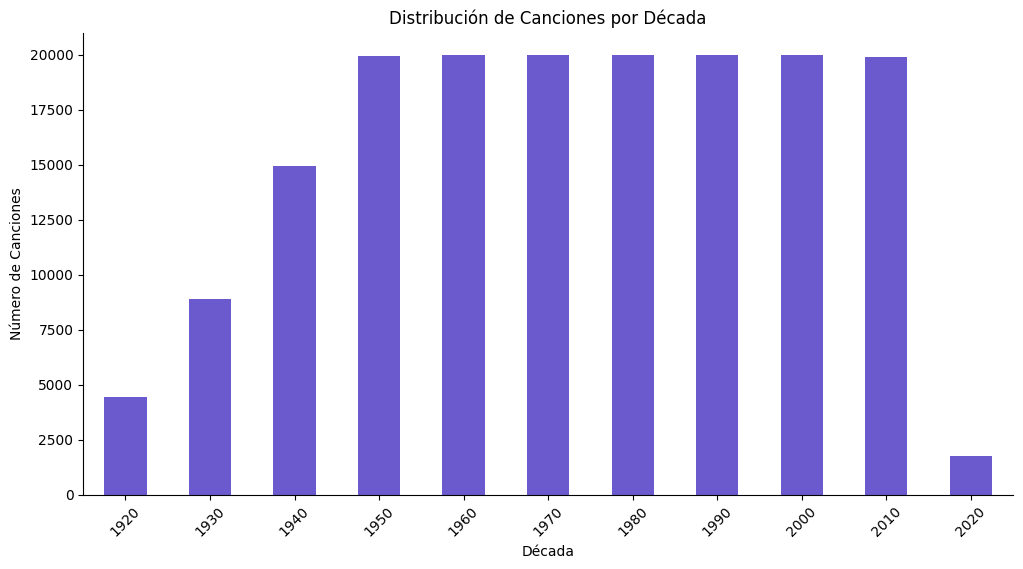

In [11]:
plt.figure(figsize=(12, 6))
df['decade'].value_counts().sort_index().plot(kind='bar', color='#6A5ACD')
plt.title('Distribución de Canciones por Década')
plt.xlabel('Década')
plt.ylabel('Número de Canciones')
plt.xticks(rotation=45)
#plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.savefig('Distribucion_Canciones_Decada.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

La distribución muestra una buena representación de la mayoría de las décadas (especialmente desde 1950 hasta 2010), excepto algunas (como las décadas de 1920 y 1930) que tienen menos canciones, y la década de 2020, que parece tener una cantidad considerablemente menor.

#### Variables númericas

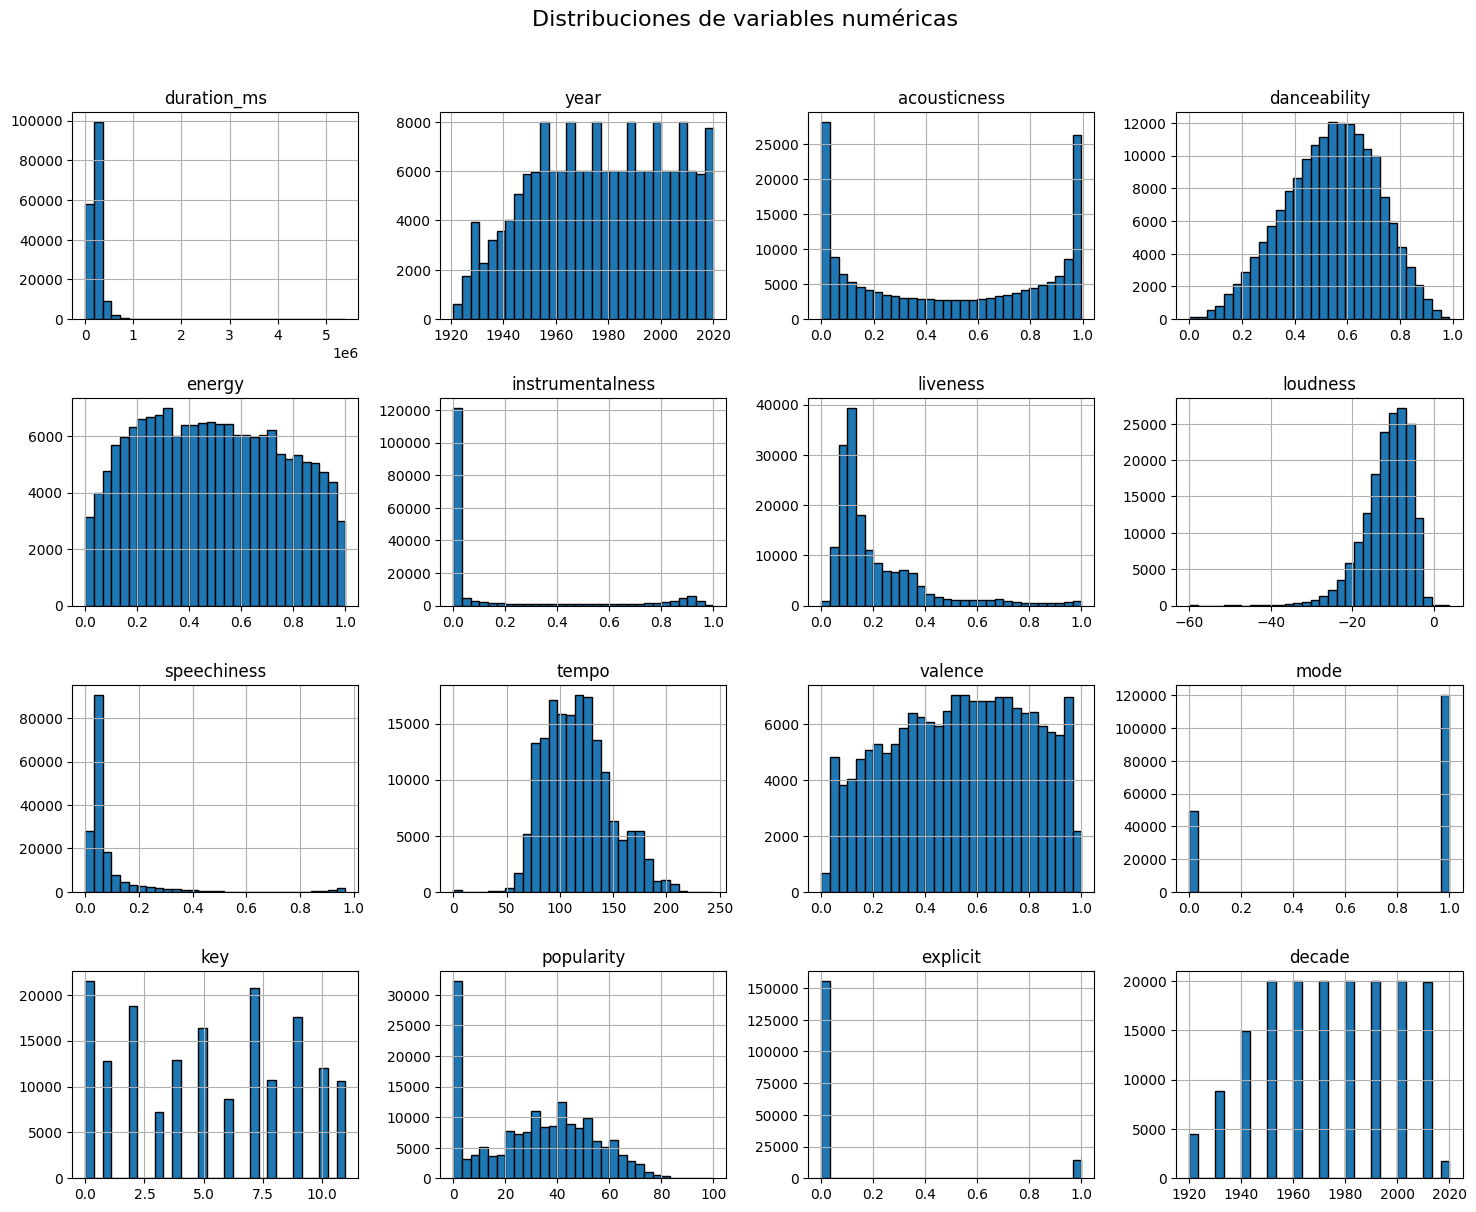

In [11]:
df.hist(figsize=(15, 15), bins=30, edgecolor='black', layout=(5, 4))
plt.suptitle('Distribuciones de variables numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Variables categóricas


Análisis de la columna categórica 'name':
Número de categorías únicas: 132938
Categorías más comunes:
name
Summertime    62
Overture      43
Home          40
Stay          34
You           33
Name: count, dtype: int64


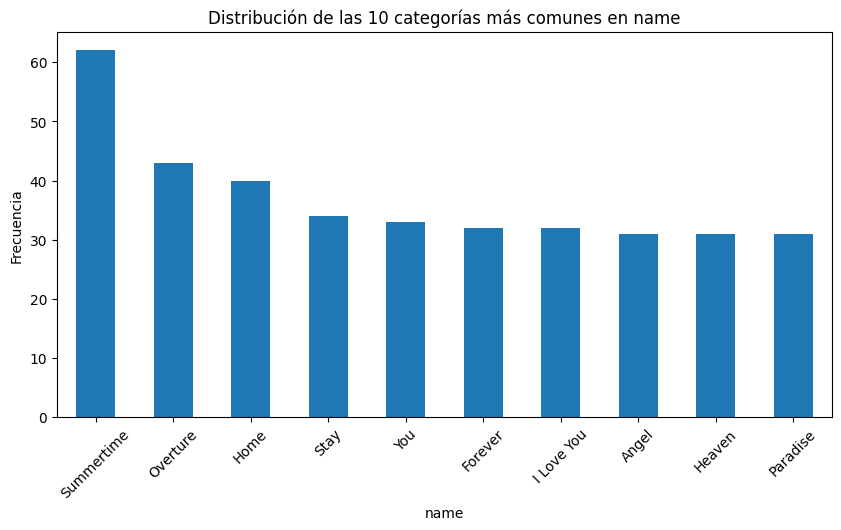


Análisis de la columna categórica 'artists':
Número de categorías únicas: 33375
Categorías más comunes:
artists
['Эрнест Хемингуэй']     1215
['Francisco Canaro']      938
['Эрих Мария Ремарк']     781
['Ignacio Corsini']       620
['Frank Sinatra']         592
Name: count, dtype: int64


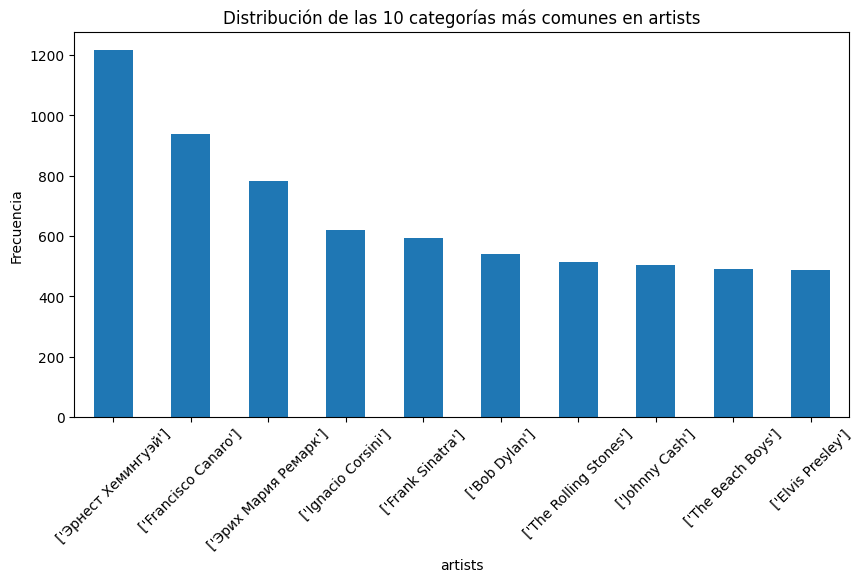


Análisis de la columna categórica 'release_date':
Número de categorías únicas: 10882
Categorías más comunes:
release_date
1945      1449
1949      1254
1935      1123
1948      1052
1/1/30    1047
Name: count, dtype: int64


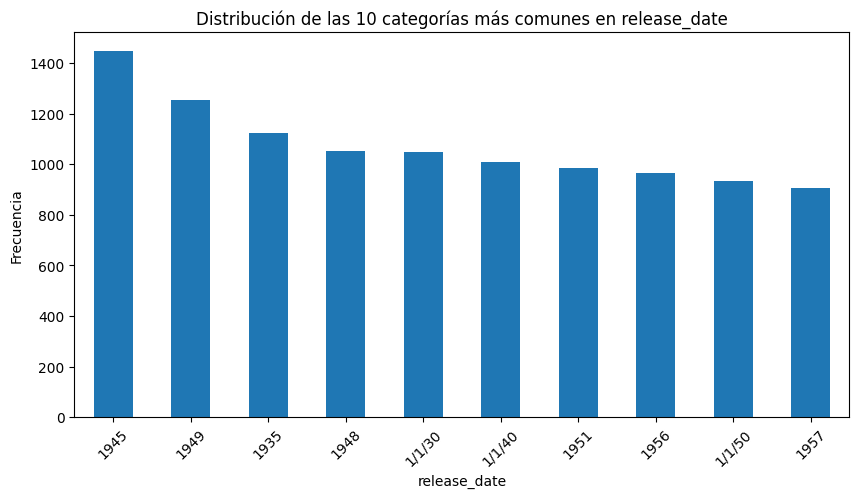

In [12]:
cat_cols = [col for col in df.select_dtypes(include=['object']).columns if col != 'id']
for col in cat_cols:
    print(f"\nAnálisis de la columna categórica '{col}':")
    print(f"Número de categorías únicas: {df[col].nunique()}")
    print(f"Categorías más comunes:\n{df[col].value_counts().head()}")
    
    plt.figure(figsize=(10, 5))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Distribución de las 10 categorías más comunes en {col}")
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

De este análisis podemos extraer varias observaciones:

- La columna name tiene un número extremadamente alto de categorías únicas. Esto indica que probablemente cada canción tiene un nombre único o casi único. No obstante, el nº total de registros es 169907 y la columna name extrae un valor de registros únicos de 132938 lo que puede indicar duplicidades de canciones, aunque tengan IDs diferentes. Será algo a explorar. No obstante, esta columna podría no ser útil para el modelo, ya que, para el enfoque de este proyecto, no aporta información relevante para la predicción de la década.

- El número de categorías es elevado en la columna artist y a la vez muestra artistas con muchos registros (canciones). Por una parte esto puede ser representativo de una década al situar a los diferentes artistas dentro de la misma. Pero desde una perspectiva más amplia y centrándonos en el enfoque del proyecto esto puede indicar un sesgo muy claro a la hora de extraer los datos, ya que la persona que realizó dicho proceso se centró de forma desbalanceada por algunos de ellos. Si bien es cierto que diferentes artistas pueden ser representación de unas épocas musicales concretas, las décadas no representan a los artistas. La información de esta variable no representa demasiada utilidad si lo que queremos es situar canciones actuales en épocas pasadas.

- La columna release_date tiene muchas categorías (10.882) y no es útil para el enfoque del proyecto. Ya se utilizó la columna year para el cálculo de la década.


A continuación se va a realizar un Frequent Label Encoding para calcular la frecuencia de cada artista en la columna artists. Es cierto que, a priori, no será una información especialmente relevante para el modelo por varios motivos. En primer lugar porque lo que queremos es clasificar canciones. En segundo lugar porque aunque el dataset contine muchos registros, no están todas y cada una de las canciones publicadas en cada una de las décadas, sino que contamos con un sesgo de extracción al utilizar un dataset de terceros. Y en tercer lugar porque un artista ha podido sacar canciones en diferentes décadas. No obstante, calcularemos Frequent Label Encoding para produndizar en su análisis y ver cómo se comporta dicha variable estadísticamente.

In [7]:
#Frequent Label Encoding (artist)

artist_counts = df['artists'].value_counts()
df['artists_frequency'] = df['artists'].map(artist_counts)

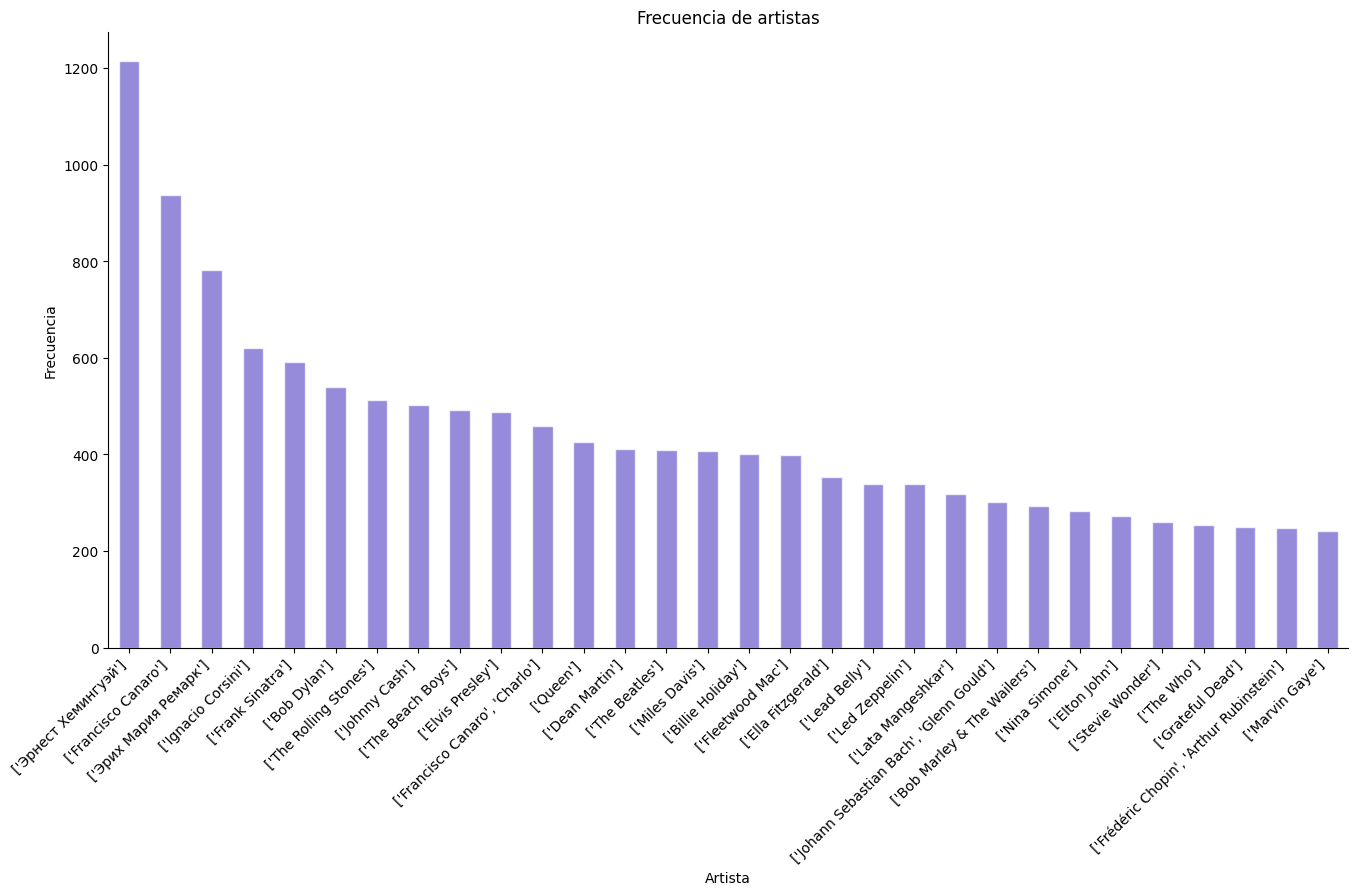

In [ ]:
top_artists = df['artists'].value_counts().head(30)

plt.figure(figsize=(16, 8))
top_artists.plot(kind='bar', edgecolor='white', alpha=0.7, color='#6A5ACD')
plt.title('Frecuencia de artistas')
plt.xlabel('Artista')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.savefig('Frecuencia_Artistas.png', dpi=300, bbox_inches='tight', facecolor='white')
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Duplicidades

In [8]:
duplicados_exactos = df[df.duplicated()]
print(f"Número de duplicados exactos: {duplicados_exactos.shape[0]}")

Número de duplicados exactos: 0


Es razonable concluir que las duplicidades (canciones con el mismo nombre pero distinto IDs) se corresponden a canciones con el mismo nombre pero totalmente diferentes o, incluso, a versiones diferentes de la misma canción. Puede haber múltiples versiones de una canción, como versiones en vivo, remixes, grabaciones de estudio, etc. Vamos a comprobar que esto es así.

In [9]:
def asignar_version(nombre):
    if 'remix' in nombre.lower():
        return 'Remix'
    elif 'remastered' in nombre.lower():
        return 'Remaster'
    elif 'live' in nombre.lower():
        return 'Live'
    else:
        return 'Original'

df['version_type'] = df['name'].apply(asignar_version)

In [10]:
df['base_name'] = df['name'].str.replace(r'(?i)(remix|remastered|live)', '', regex=True).str.strip()

versiones_diferentes = df[df.duplicated(subset='base_name', keep=False)]

versiones_diferentes = versiones_diferentes.sort_values(by='base_name')
print("Canciones con diferentes versiones:")
versiones_diferentes[['base_name', 'name', 'artists', 'release_date']]


Canciones con diferentes versiones:


,base_name,name,artists,release_date
3,"""40"" - 2008","""40"" - Remastered 2008",['U2'],2/28/83
4,"""40"" - 2008","""40"" - Remastered 2008",['U2'],2/28/83
13,"""Carmen Fantasie"", by Franz Waxman, based on t...","""Carmen Fantasie"", by Franz Waxman, based on t...","['Georges Bizet', 'Jascha Heifetz', 'Donald Vo...",1934
14,"""Carmen Fantasie"", by Franz Waxman, based on t...","""Carmen Fantasie"", by Franz Waxman, based on t...","['Georges Bizet', 'Jascha Heifetz', 'Donald Vo...",1946
51,"""The Take Over, The Breaks Over""","""The Take Over, The Breaks Over""",['Fall Out Boy'],1/1/07
...,...,...,...,...
169871,鴛鴦夢,鴛鴦夢,['環球管弦樂隊'],6/22/66
169874,黃昏,黃昏,['Steve Chou'],12/25/00
169875,黃昏,黃昏,['白光'],5/1/42
169877,黃葉舞秋風,黃葉舞秋風,['周璇'],2/1/40


Conclusión: dado que se trata de una análisis de canciones, sin ninguna prioridad hacia canciones originales, en directo, en estudio, etc. Se mantendrán todos los registros.

Dado que deberemos probar entre diferentes modelos y cada uno de ellos trata mejor los datos de una forma diferente, procederemos a hacer Label Encoding y Dummies para la nueva columna creada de version_type. Para cada uno utilizaremos unas variables dependiendo de lo que sea más adecuado.

In [11]:
#Dummies
dummies = pd.get_dummies(df['version_type'], prefix='version', dtype=int)
df = pd.concat([df, dummies], axis=1)

In [12]:
#Label encoding
le = LabelEncoder()
df['version_type_encoded'] = le.fit_transform(df['version_type'])

In [20]:
df.columns

Index(['id', 'name', 'artists', 'duration_ms', 'release_date', 'year',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'popularity', 'explicit', 'decade', 'artists_frequency',
       'version_type', 'base_name', 'version_Live', 'version_Original',
       'version_Remaster', 'version_Remix', 'version_type_encoded'],
      dtype='object')

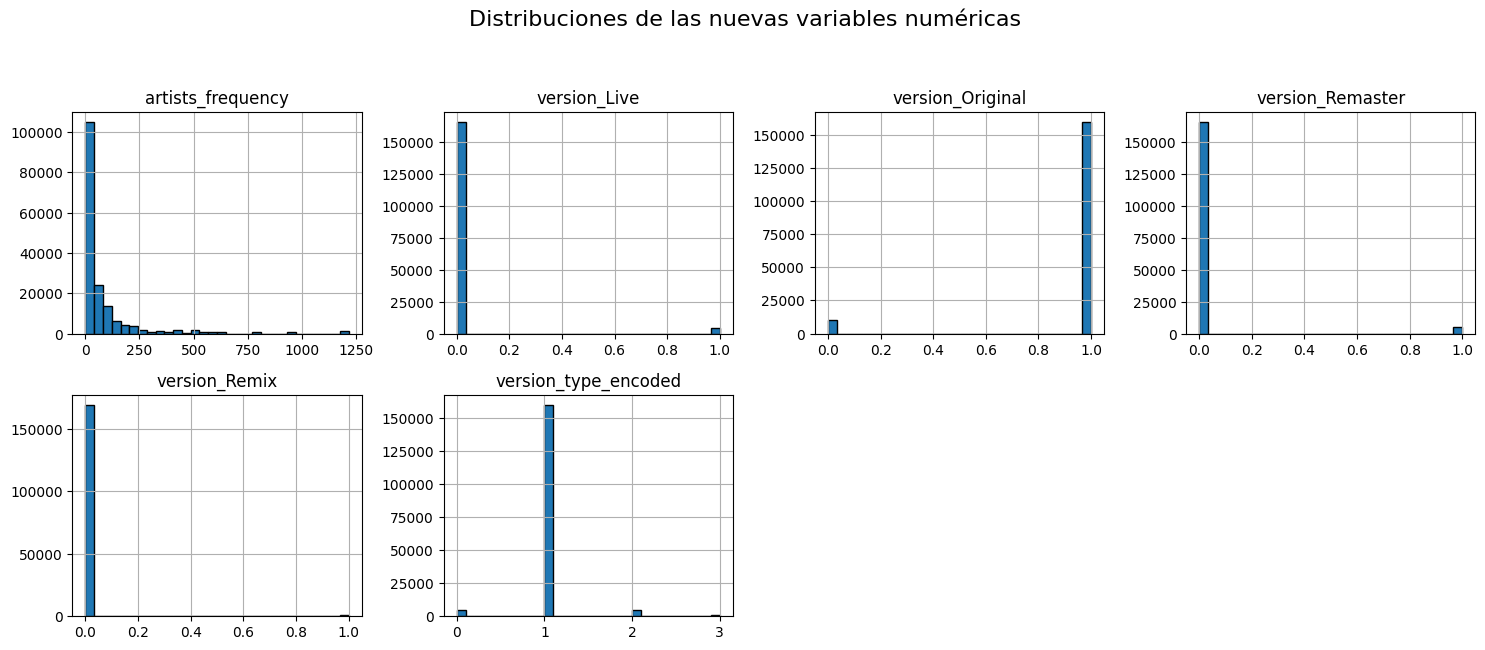

In [21]:
df[['artists_frequency','version_type', 
    'base_name', 'version_Live', 
    'version_Original', 'version_Remaster', 
    'version_Remix', 'version_type_encoded']].hist(figsize=(15, 15), bins=30, edgecolor='black', layout=(5, 4))
plt.suptitle('Distribuciones de las nuevas variables numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

 Las variables dummies tienen un sesgo hacia 0, lo que significa que la mayoría de las canciones no son versiones en vivo, remasterizadas o remixes. Esto podría ser útil en el análisis para identificar tipos de canciones más raras, pero hay que evaluar si estas variables tienen suficiente peso en la predicción de la variable objetivo, ya que el objetivo del estudio es la clasificación por décadas.

 Esto también se aprecia en la variable version_type_encoded que tiene una distribución muy sesgada, lo que puede limitar su capacidad de contribuir al modelo al no haber un número suficiente de ejemplos de Remix o Remaster.

 Por lo tanto, y aunque se explorará más adelante, es posible sospechar que estas variables no contribuirán de forma clara al modelo. 

#### Correlaciones

In [22]:
df.corr(numeric_only=True)

,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key,popularity,explicit,decade,artists_frequency,version_Live,version_Original,version_Remaster,version_Remix,version_type_encoded
duration_ms,1.000000,0.076293,-0.079316,-0.134491,0.036400,0.084811,0.034265,-0.014685,-0.058452,-0.028813,...,-0.003112,0.063290,-0.043813,0.076270,-0.114621,0.103495,-0.080583,0.006626,0.017834,-0.046704
year,0.076293,1.000000,-0.624552,0.203433,0.532420,-0.291571,-0.055839,0.490118,-0.120937,0.137893,...,0.012503,0.880725,0.245227,0.993476,-0.300514,-0.009829,0.008389,-0.034058,0.068918,0.022914
acousticness,-0.079316,-0.624552,1.000000,-0.265943,-0.750282,0.335818,-0.023876,-0.567071,-0.056080,-0.204979,...,-0.021683,-0.593349,-0.253693,-0.619742,0.055413,-0.020878,0.043706,-0.012691,-0.065690,-0.030889
danceability,-0.134491,0.203433,-0.265943,1.000000,0.220561,-0.281424,-0.105522,0.294168,0.225314,-0.004880,...,0.022591,0.221085,0.241900,0.200908,0.052554,-0.074101,0.064581,-0.045678,0.054758,0.045817
energy,0.036400,0.532420,-0.750282,0.220561,1.000000,-0.287689,0.126299,0.782982,-0.045224,0.249933,...,0.029980,0.497492,0.142680,0.531824,-0.149222,0.053431,-0.066545,0.018641,0.054930,0.009622
instrumentalness,0.084811,-0.291571,0.335818,-0.281424,-0.287689,1.000000,-0.047402,-0.417032,-0.115737,-0.107568,...,-0.014264,-0.299832,-0.138294,-0.288850,0.000397,-0.009958,0.008772,0.008281,-0.024398,-0.002517
liveness,0.034265,-0.055839,-0.023876,-0.105522,0.126299,-0.047402,1.000000,0.052987,0.147665,0.008128,...,-0.000102,-0.075295,0.039269,-0.054531,0.078322,0.386896,-0.260197,-0.000491,-0.008099,-0.229977
loudness,-0.014685,0.490118,-0.567071,0.294168,0.782982,-0.417032,0.052987,1.000000,-0.105795,0.211113,...,0.021918,0.466548,0.152697,0.489214,-0.145021,-0.007143,-0.020678,0.011456,0.055808,0.041129
speechiness,-0.058452,-0.120937,-0.056080,0.225314,-0.045224,-0.115737,0.147665,-0.105795,1.000000,-0.010068,...,0.015228,-0.135708,0.413074,-0.121997,0.375040,0.012144,0.014610,-0.040129,0.015196,-0.022543
tempo,-0.028813,0.137893,-0.204979,-0.004880,0.249933,-0.107568,0.008128,0.211113,-0.010068,1.000000,...,0.003145,0.135049,0.011485,0.137068,-0.004494,0.013539,-0.018221,0.008761,0.009408,0.002381


In [13]:
decade_col = df['decade']
df = df.drop(columns=['decade'])
df['decade'] = decade_col

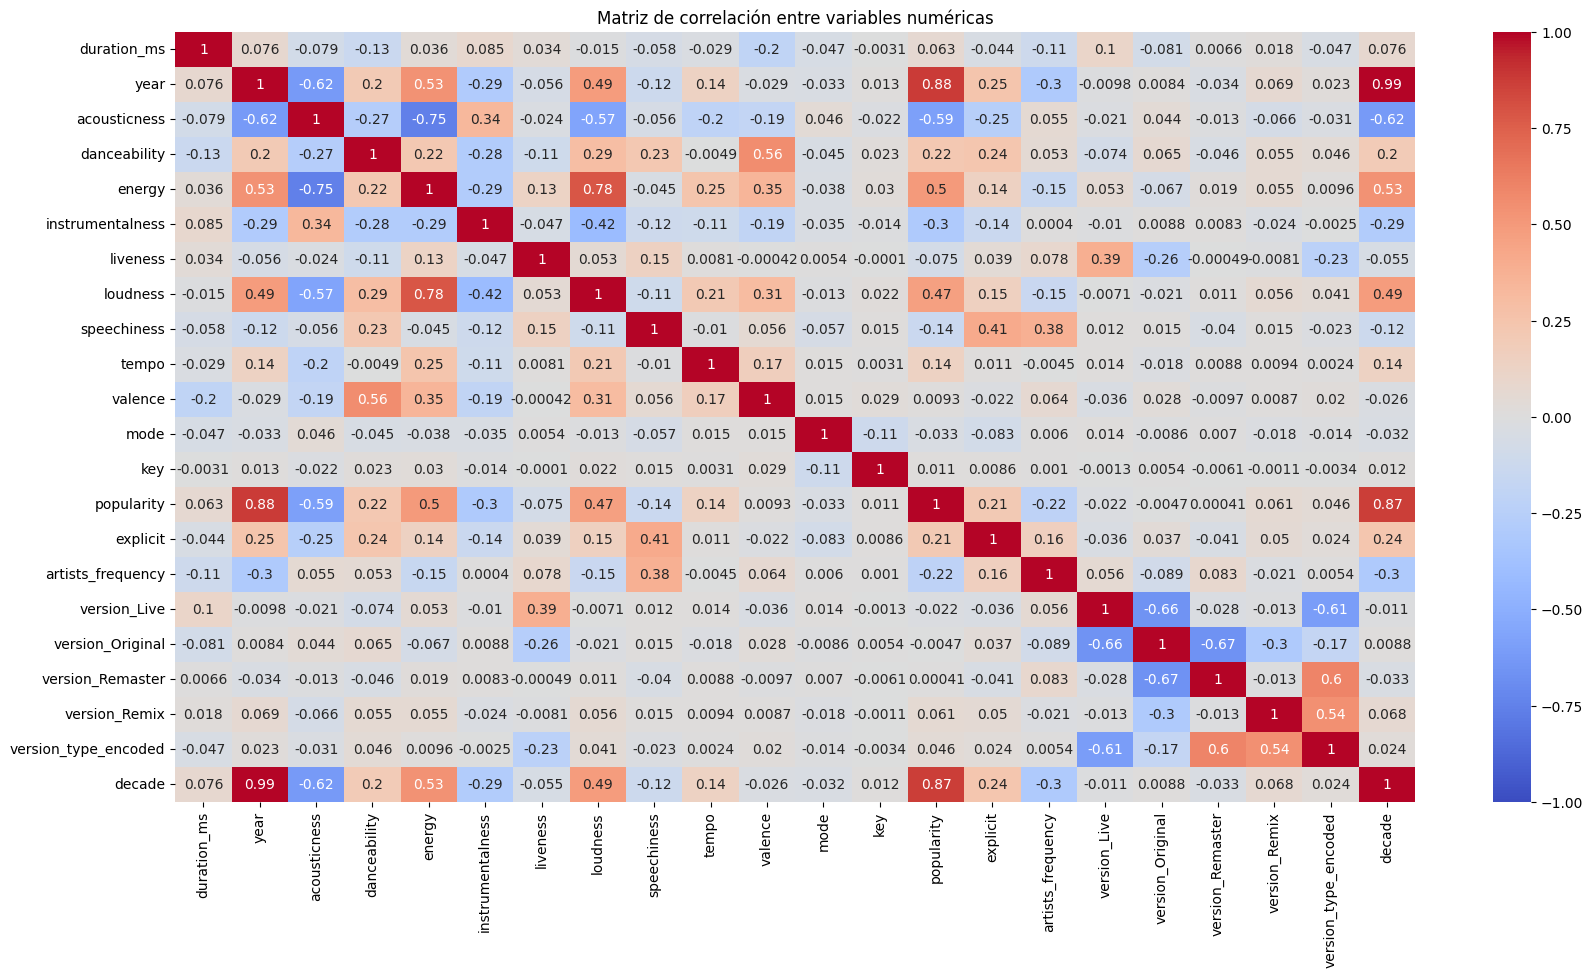

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

In [26]:
df.corr(numeric_only=True)["decade"].sort_values(ascending=False)

decade                  1.000000
year                    0.993476
popularity              0.871549
energy                  0.531824
loudness                0.489214
explicit                0.241324
danceability            0.200908
tempo                   0.137068
duration_ms             0.076270
version_Remix           0.068120
version_type_encoded    0.023687
key                     0.012308
version_Original        0.008772
version_Live           -0.010960
valence                -0.026276
mode                   -0.032455
version_Remaster       -0.033133
liveness               -0.054531
speechiness            -0.121997
instrumentalness       -0.288850
artists_frequency      -0.302515
acousticness           -0.619742
Name: decade, dtype: float64

**Variables con correlación positiva:**
- La variable *year* tiene una correlación muy alta con decade (0.99). Esto es esperable, ya que la década se deriva del año.
- La variable *popularity* muestra una correlación positiva significativa con decade (0.87), lo que sugiere que las canciones más populares podrían estar asociadas con décadas más recientes.
- *energy* también tiene una correlación positiva notable (0.53), lo que podría indicar que las canciones con más energía tienden a pertenecer a décadas más recientes.

**Variables con correlación negativa:**
- *acousticness* presenta una correlación negativa moderada (-0.62), lo que sugiere que las canciones más antiguas tienden a ser más acústicas.
- *instrumentalness* tiene una correlación negativa débil (-0.29), lo que podría significar que las canciones más antiguas tienden a ser más instrumentales.
- La variable *artists_frequency* presenta una correlación negativa moderada de -0.302515 con la variable decade, lo que sugiere que los artistas que tienen un mayor número de canciones en el dataset están más asociados con décadas pasadas. **No obstante, conviene manejar esto con atención ya que el dataset es una selección (sesgada) de canciones y artistas y no refleja el total de registros publicados en la historia.**  


**Multicolinealidad:**

- *energy* y *loudness*: Tienen una correlación de 0.78, lo que indica que ambas variables están relacionadas, probablemente porque canciones con mayor energía suelen ser más ruidosas.
- *acousticness* y *energy*: Tienen una relación negativa de -0.75, lo que sugiere que canciones acústicas suelen tener menor energía. Dependiendo del modelo, ambas podrían mantenerse debido a que aportan información diferente (una positiva, otra negativa).
- *danceability* y *valence*: Correlación moderada de 0.56, lo que indica que canciones con mayor valencia (positividad) suelen ser más bailables.
- *popularity* también mantiene una relación siginficativa con acousticness (-0.59), energy (0,5), loudness (0,47), instrumentalness (-0,3) y danceability (0,22).


### Agrupaciones más amplias

En este momento y después de los análisis previos se toma la decisión de centrarnos en las décadas desde 1950 hasta la de 2010, ésta última no incluida. Esta decisión se fundamenta en dos motivos principales:

- **Motivo estadístico:** El análisis descriptivo previo nos ha mostrado una descompensación de datos en función de las décadas. El periodo escogido sí tiene una representación equilibrada.
- **Motivo de negocio:** Si el objetivo es que personas de edad avanzada puedan escuchar canciones de ahora que suenan a décadas pasadas, esas en las que ellos eran más jóvenes y descubrían nueva música, contar con décadas anteriores a los 50 no tendría mucho sentido por el propio perfil (edad) de los usuarios, ni canciones a partir de 2010, ya que pueden estar más cercanas a la actualidad.

Además, tras probar los primeros modelos, se concluye que los datos están tremendamente sesgados y no captan una representación y diferenciación fidedigna por décadas. Es por ellos se toma la decisión de agrupar la variable target en rango más amplio con el fin de afinar la precisión de los modelos manteniendo el mismo enfoque del proyecto.

In [14]:
#Incluimos solo canciones entre las décadas de 1950 y 2010 (ésta última no incluida)
df = df[(df['decade'] >= 1950) & (df['decade'] < 2010)]

In [15]:
#Agrupación
def asignar_rango_decada(decade):
    if 1950 <= decade <= 1969:
        return '50s-60s'
    elif 1970 <= decade <= 1989:
        return '70s-80s'
    elif 1990 <= decade <= 2009:
        return '90s-00s' 

In [16]:
df['decade_range'] = df['decade'].apply(asignar_rango_decada)

Exploramos la distribución de la nueva variable objetivo

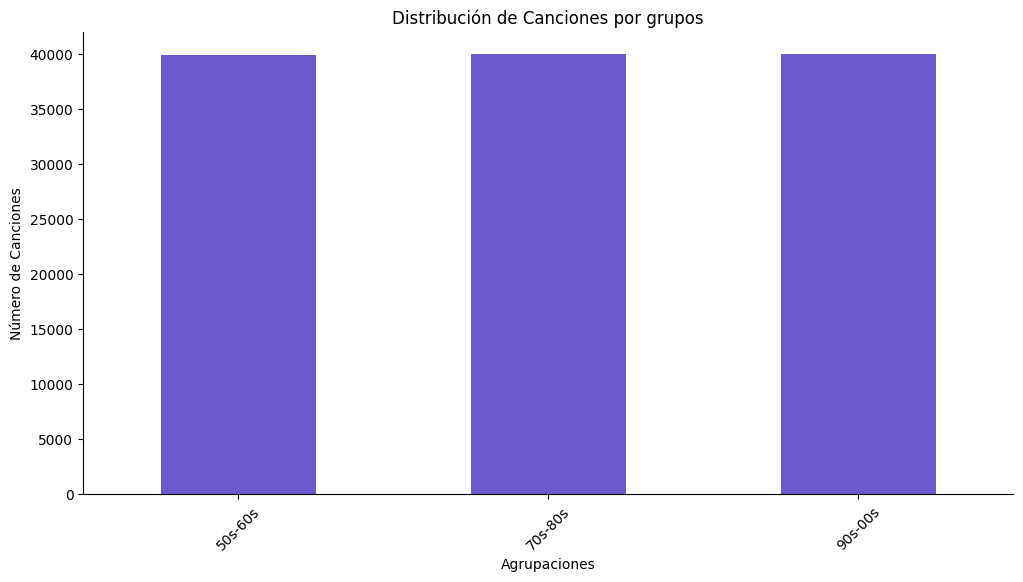

In [37]:
plt.figure(figsize=(12, 6))
df['decade_range'].value_counts().sort_values().plot(kind='bar', color='#6A5ACD')
plt.title('Distribución de Canciones por grupos')
plt.xlabel('Agrupaciones')
plt.ylabel('Número de Canciones')
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig('Distribucion_Canciones_Agrupación.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

<mark>**Observaciones:**</mark> Los rangos 90s-00s, 70s-80s, y 50s-60s tienen un número similar de canciones, en torno a 40,000 en cada uno. Esto sugiere que el dataset está balanceado en estos grupos de décadas, lo cual es positivo para la clasificación, ya que no existen grandes sesgos hacia un grupo en particular.

El rango 2010 tiene significativamente menos canciones, con un número aproximado de 20,000, la mitad que los otros grupos. La menor representación del grupo 2010 podría afectar el rendimiento del modelo en la clasificación de esta década, ya que el modelo tendrá menos ejemplos de este período para aprender patrones específicos. 

<mark>**Conclusión y decisión:**</mark>

En este momento se toma la decisión de enfocar el análisis solo en las décadas con una representación adecuada y descargar el grupo de los 2010s. Como en el caso anterior, tenemos tanto motivos estadísticos como coherente con el enfoque del proyecto.

Motivos estadísticas: Al eliminar el grupo de 2010, se podría mejorar la precisión general del modelo. Con un conjunto de datos más balanceado, el modelo podría ser capaz de aprender patrones significativos de cada década sin que la falta de datos en una categoría específica afecte negativamente el rendimiento.

Motivos de enfoque/negocio: Las décadas 50s-60s, 70s-80s, y 90s-00s representan períodos musicales ricos y variados, que abarcan la evolución de géneros y estilos que definieron la música moderna. Además, el objetivo es ver qué canciones de hoy en día se asemejan a décadas pasadas, en las que los usuarios de mayor estaban en sus épocas más jóvenes y eran más propensos a descubrir nueva música. Focalizar el análisis en estos períodos puede ser más relevante para el objetivo del proyecto que un análisis de la década de 2010, que aún está en transición y cuyas tendencias pueden no estar completamente asentadas.

### Creación de nuevas variables

En la creación de los primeros modelos básicos se ha detectado la necesidad de profundizar en en análisis de las variables predictoras con el objetivo de explorar relaciones que pudieran pasar desapercibidas y contribuir potencialmente a mejorar los modelos.

**"Energía bailable positiva":** La combinación de energy, danceability, y valence podría representar canciones energéticas, bailables y de tono positivo, características comunes en ciertas décadas.

In [17]:
df['energy_danceability_valence'] = df['energy'] * df['danceability'] * df['valence']

**"Intensidad acústica":** Multiplicar acousticness con loudness puede crear una métrica que mida la intensidad de las canciones acústicas, lo que podría ser útil para identificar canciones de épocas con un sonido más orgánico.

In [18]:
df['acoustic_intensity'] = df['acousticness'] * df['loudness']

**Ratio de popularidad con energía:** La relación entre popularity y energy puede ser útil para medir si una canción enérgica tiene una mayor o menor popularidad, lo que podría variar entre décadas.

In [19]:
df['popularity_energy_ratio'] = df['popularity'] / (df['energy'] + 1e-5)

**Diferencia entre Valence y Energy:** Este valor podría ayudar a diferenciar canciones alegres y enérgicas de canciones tranquilas pero alegres para explorar si ciertas décadas eran más propensas a propuestas de este tipo.

In [20]:
df['valence_energy_dif'] = df['valence'] - df['energy']

### Análisis nuevas columnas

In [33]:
df.columns

Index(['id', 'name', 'artists', 'duration_ms', 'release_date', 'year',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'popularity', 'explicit', 'artists_frequency', 'version_type',
       'base_name', 'version_Live', 'version_Original', 'version_Remaster',
       'version_Remix', 'version_type_encoded', 'decade', 'decade_range',
       'energy_danceability_valence', 'acoustic_intensity',
       'popularity_energy_ratio', 'valence_energy_dif'],
      dtype='object')

In [40]:
#Variables nuevas
new_features = ['energy_danceability_valence', 'acoustic_intensity',
       'popularity_energy_ratio', 'valence_energy_dif', 'decade_range']

In [41]:
df_new_features = df[new_features]

Exploramos la distribución de las nuevas variables combinadas

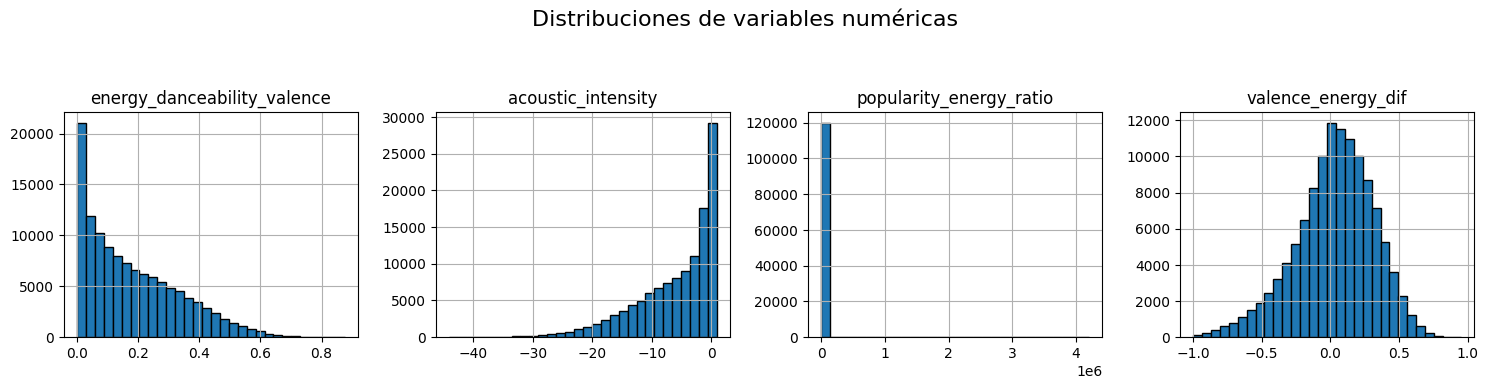

In [36]:
df_new_features.hist(figsize=(15, 15), bins=30, edgecolor='black', layout=(5, 4))
plt.suptitle('Distribuciones de variables numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<mark>**Observaciones:**</mark> Algunas de estas variables (como popularity_energy_ratio y acoustic_intensity) tienen distribuciones muy sesgadas, lo cual podría afectar negativamente a los modelos lineales o aquellos sensibles a la escala. Deberían ser transformadas en posibles modelos lineales. 

Por su parte, *valence_energy_diff* tiene una distribución más balanceada, con una forma aproximadamente normal centrada cerca de 0. Esto indica que, en promedio, la diferencia entre valence y energy es cercana a 0. Los valores positivos podrían representar canciones alegres pero tranquilas, mientras que los valores negativos podrían indicar canciones enérgicas pero con un tono menos alegre.

### Correlaciones de las variables combinadas

Exploramos la correlación de las variables combinadas juntos con las originales

In [21]:
#Convertimos a númerica la variable target
decade_mapping = {}
for idx, decade in enumerate(sorted(df['decade_range'].unique())):
    decade_mapping[decade] = idx
df['decade_label'] = df['decade_range'].map(decade_mapping)

In [22]:
origin_comb = ['id', 'name', 'artists', 'duration_ms', 'release_date', 'year', 
               'acousticness', 'danceability', 'energy', 'instrumentalness',
               'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
               'key', 'popularity', 'explicit', 'energy_danceability_valence', 'acoustic_intensity',
               'popularity_energy_ratio', 'valence_energy_dif', 'decade_range', 'decade_label', 'decade']

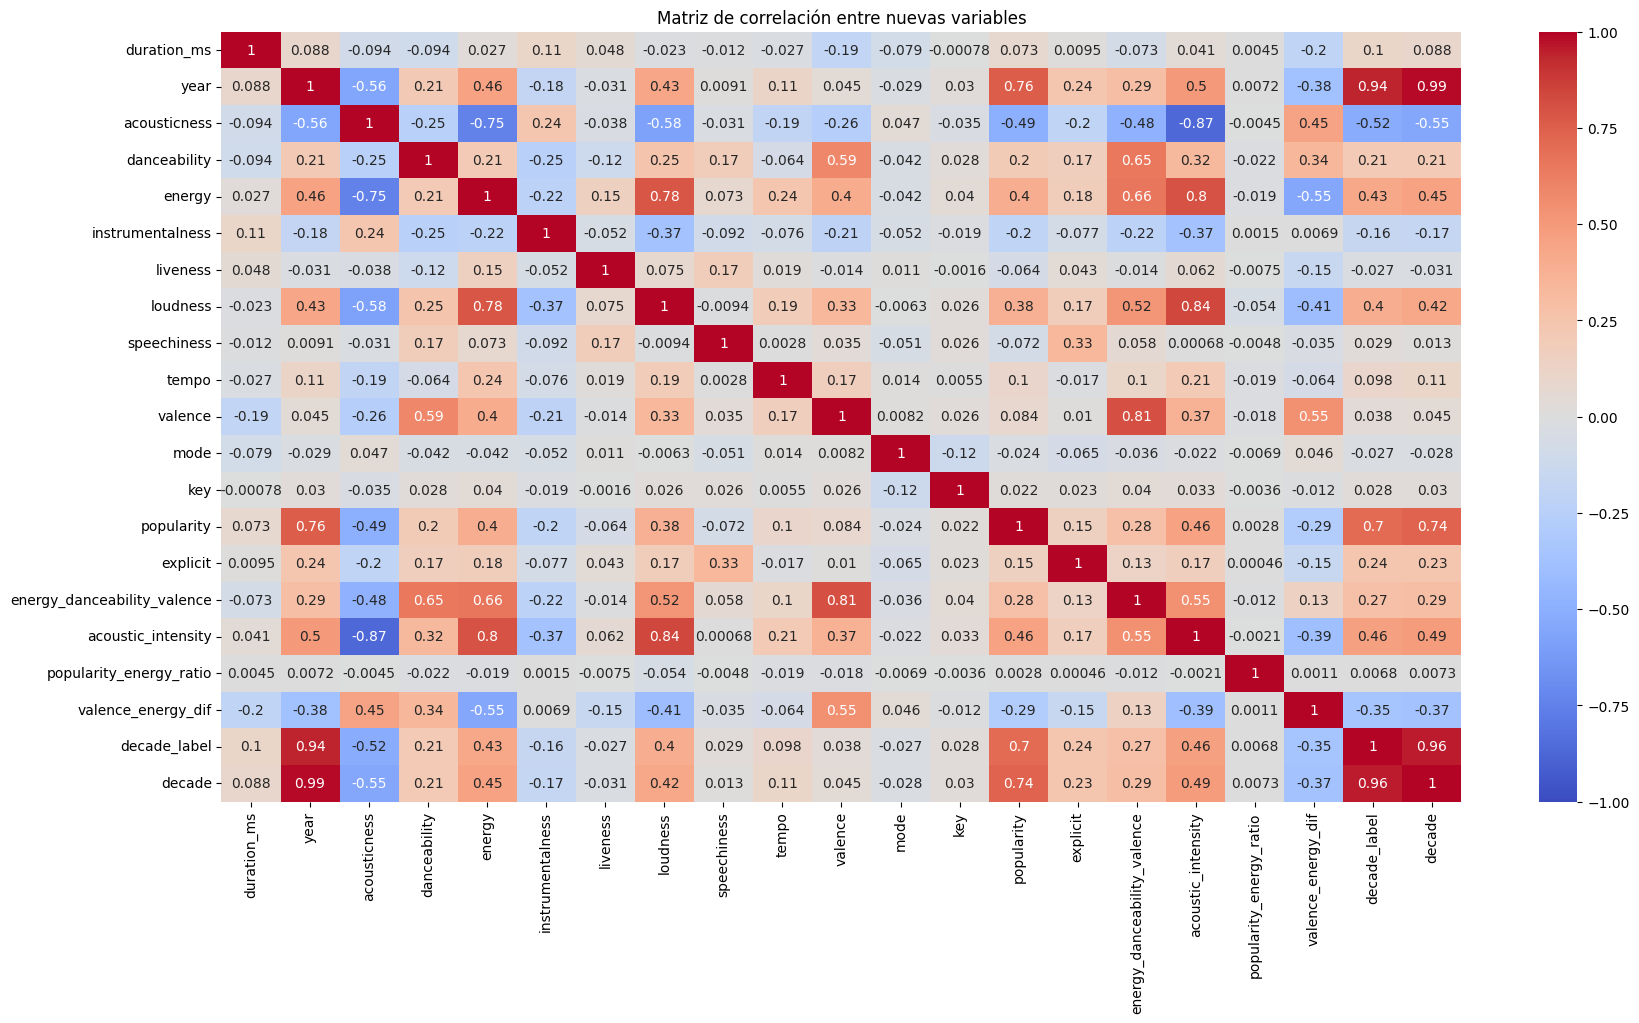

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df[origin_comb].corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación entre nuevas variables')
#plt.savefig('Correlaciones.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [41]:
df.corr(numeric_only=True)["decade"].sort_values(ascending=False)

decade                         1.000000
year                           0.986138
decade_label                   0.956162
popularity                     0.741780
acoustic_intensity             0.488408
energy                         0.454479
loudness                       0.424253
energy_danceability_valence    0.291837
explicit                       0.234814
danceability                   0.210164
tempo                          0.107313
duration_ms                    0.088232
version_Original               0.056863
valence                        0.045245
version_Remix                  0.033192
key                            0.030126
speechiness                    0.013239
popularity_energy_ratio        0.007283
version_type_encoded           0.000673
mode                          -0.028130
liveness                      -0.030661
version_Live                  -0.035610
version_Remaster              -0.057463
instrumentalness              -0.168567
artists_frequency             -0.216767


In [42]:
df.corr(numeric_only=True)["decade_label"].sort_values(ascending=False)

decade_label                   1.000000
decade                         0.956162
year                           0.942914
popularity                     0.704051
acoustic_intensity             0.463241
energy                         0.425659
loudness                       0.397426
energy_danceability_valence    0.274574
explicit                       0.236832
danceability                   0.205972
duration_ms                    0.101802
tempo                          0.098334
version_Original               0.055754
valence                        0.038443
version_Remix                  0.029645
speechiness                    0.028734
key                            0.028392
popularity_energy_ratio        0.006844
version_type_encoded          -0.004680
liveness                      -0.026672
mode                          -0.026888
version_Live                  -0.031080
version_Remaster              -0.059026
instrumentalness              -0.156809
artists_frequency             -0.220277


<mark>Observación:</mark> Como era de esperar, las correlaciones se mantiene casi identicas entre las variables y la nueva variable que agrupa las décadas en rangos más amplios.

### Outliers

In [48]:
df.columns

Index(['id', 'name', 'artists', 'duration_ms', 'release_date', 'year',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'popularity', 'explicit', 'artists_frequency', 'version_type',
       'base_name', 'version_Live', 'version_Original', 'version_Remaster',
       'version_Remix', 'version_type_encoded', 'decade', 'decade_range',
       'energy_danceability_valence', 'acoustic_intensity',
       'popularity_energy_ratio', 'valence_energy_dif', 'decade_label'],
      dtype='object')

In [49]:
numeric_col = ['duration_ms','acousticness', 'danceability', 
           'energy', 'instrumentalness', 'liveness', 'loudness', 
           'speechiness', 'tempo', 'valence', 'mode',
           'key', 'popularity', 'explicit', 'artists_frequency',
           'version_Live', 'version_Original', 'version_Remaster',
           'version_Remix', 'version_type_encoded',
           'energy_danceability_valence', 'acoustic_intensity',
           'popularity_energy_ratio', 'valence_energy_dif', 'decade_label']

In [50]:
# Cálculo de outliers
Q1 = df[numeric_col].quantile(0.25)
Q3 = df[numeric_col].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (df[numeric_col] < (Q1 - 1.5 * IQR)) | (df[numeric_col] > (Q3 + 1.5 * IQR))

print("Número de outliers por columna:")
print(outlier_mask.sum().sort_values(ascending=False))


print("\nPorcentaje de outliers por columna:")
print(((outlier_mask.sum() / len(df[numeric_col])) * 100).sort_values(ascending=False))

Número de outliers por columna:
instrumentalness               25638
speechiness                    15161
artists_frequency              11405
popularity_energy_ratio        10772
version_type_encoded            9019
version_Original                9019
liveness                        8857
explicit                        5962
duration_ms                     5624
version_Remaster                4360
version_Live                    4111
loudness                        2993
acoustic_intensity              2242
valence_energy_dif              2013
tempo                           1159
energy_danceability_valence      642
version_Remix                    548
popularity                        77
danceability                      40
acousticness                       0
energy                             0
mode                               0
valence                            0
key                                0
decade_label                       0
dtype: int64

Porcentaje de outliers por co

<mark>**Observación:**</mark> Las columnas con muchos outliers pueden influir negativamente en los modelos predictivos (especialmente si son sensibles a escalas, como regresión logística o KNN) o en el cálculo de métricas como la media. Será necesrio probar transformaciones como escalado robusto (RobustScaler) o normalización logarítmica para variables altamente sesgadas.

### Variable popularity

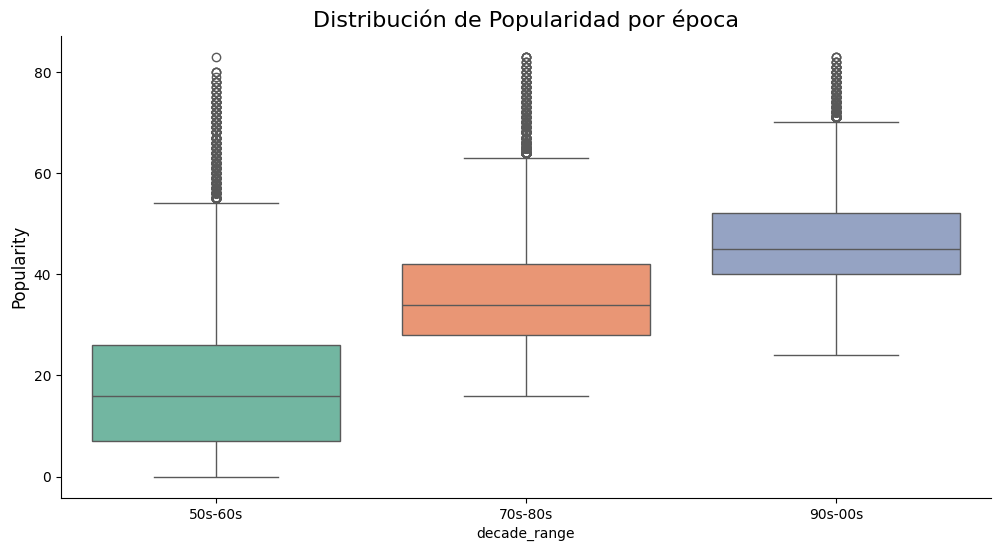

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='decade_range', y='popularity', hue='decade_range', palette='Set2', dodge=False)

plt.title('Distribución de Popularidad por época', fontsize=16)
#plt.xlabel('Época (Decade)', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.savefig('Popularity_decadas_pasadas.png', dpi=300, bbox_inches='tight', facecolor='white')

plt.show()

In [25]:
df_tracks = pd.read_csv("../data/raw/actual_tracks.csv")

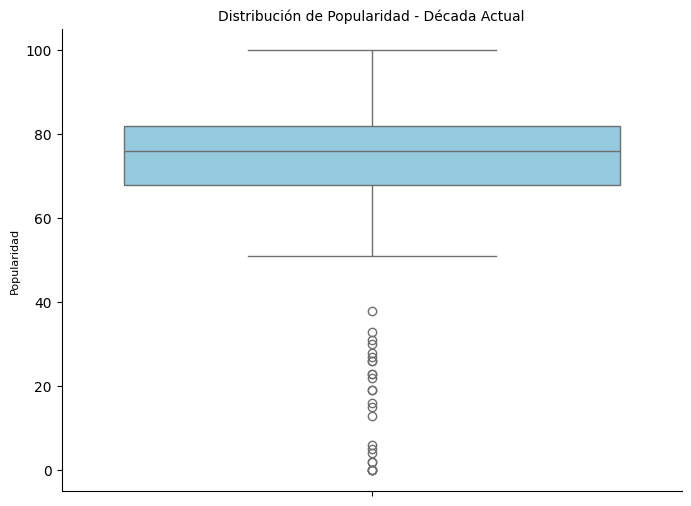

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_tracks, y='popularity', color='skyblue')
plt.title('Distribución de Popularidad - Década Actual', fontsize=10)
plt.ylabel('Popularidad', fontsize=8)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.savefig('Popularity_decadas_actual.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

<mark>**Observación:**</mark> En la comparación entre los diferentes boxplot se aprecia una **tendencia general hacia mayor popularidad.** En los boxplots de épocas pasadas, la mediana de popularidad aumentaba con el tiempo (Época 0 < Época 1 < Época 2). Este segundo gráfico refuerza esa tendencia, mostrando que la popularidad promedio en la década actual es notablemente más alta que en décadas anteriores. Además, El rango intercuartil (IQR) es más estrecho en esta década, lo que indica que la mayoría de las canciones tienen niveles de popularidad cercanos (entre 80 y 100). En comparación, las décadas anteriores mostraban mayor variabilidad, con valores dispersos en rangos más amplios.

<mark>**Conclusión y decisión:**</mark>El comportamiento de la variable popularity en las pruebas de los modelos baseline se ha demostrado crítica ya que introduce un sesgo significativo en el modelo, ya que no representa un atributo inherente de las canciones, sino su contexto actual. Este comportamiento provoca que el modelo dependa en exceso de esta variable y pierda la capacidad de generalizar para cumplir con el objetivo real (relacionar canciones actuales con décadas pasadas). **Es por ello que se toma la decisión de normalizar esta variable en relación a la agrupación por décadas que hemos hecho anterirmente.**

In [63]:
df['popularity_normalized'] = (df['popularity'] - df.groupby('decade_label')['popularity'].transform('mean')) / df.groupby('decade_label')['popularity'].transform('std')

In [68]:
pairplot_col = ['duration_ms','acousticness', 'danceability', 
           'energy', 'instrumentalness', 'liveness', 'loudness', 
           'speechiness', 'tempo', 'valence', 'mode',
           'key', 'popularity', 'energy_danceability_valence', 'acoustic_intensity',
           'popularity_energy_ratio', 'valence_energy_dif', 'popularity_normalized', 'decade_label']

In [73]:
#sns.pairplot(df[pairplot_col], hue="decade_label", height=2.5)

In [ ]:
#Dataframe processed

#df.to_csv("processed.csv") 


In [ ]:
#Train y test

from sklearn.model_selection import train_test_split

#train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['decade_label'])

In [ ]:
#train.to_csv("train.csv", index=False) 

In [ ]:
#test.to_csv("test.csv", index=False) 

### Preparamos dataset de las canciones actuales

In [2]:
df_tracks = pd.read_csv("../data/raw/actual_tracks.csv")

In [3]:
df_tracks.head(5)

,Unnamed: 0,id,name,artists,duration_ms,release_date,year,popularity,explicit,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key
0,0,2kJRlOyrxsy7Ot3c5TZ8Q6,Meu Pedaço de Pecado,João Gomes,157175,2021-06-01,2021,0,False,0.36900,0.668,0.887,0.000001,0.2570,-4.404,0.0564,151.920,0.9070,0,11
1,1,2QjOHCTQ1Jl3zawyYOpxh6,Sweater Weather,The Neighbourhood,240400,2013-04-22,2013,90,False,0.04950,0.612,0.807,0.017700,0.1010,-2.810,0.0336,124.053,0.3980,1,10
2,2,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,200040,2020-03-20,2020,88,False,0.00143,0.513,0.730,0.000095,0.0897,-5.940,0.0598,171.001,0.3340,1,1
3,3,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,182160,2019-05-17,2019,86,False,0.75100,0.501,0.405,0.000000,0.1050,-5.679,0.0319,109.891,0.4460,1,1
4,4,5CZ40GBx1sQ9agT82CLQCT,traitor,Olivia Rodrigo,229226,2021-05-21,2021,83,False,0.69100,0.380,0.339,0.000000,0.1200,-7.885,0.0338,100.607,0.0849,1,3


In [4]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        320 non-null    int64  
 1   id                320 non-null    object 
 2   name              320 non-null    object 
 3   artists           320 non-null    object 
 4   duration_ms       320 non-null    int64  
 5   release_date      320 non-null    object 
 6   year              320 non-null    int64  
 7   popularity        320 non-null    int64  
 8   explicit          320 non-null    bool   
 9   acousticness      320 non-null    float64
 10  danceability      320 non-null    float64
 11  energy            320 non-null    float64
 12  instrumentalness  320 non-null    float64
 13  liveness          320 non-null    float64
 14  loudness          320 non-null    float64
 15  speechiness       320 non-null    float64
 16  tempo             320 non-null    float64
 1

In [5]:
df_tracks = df_tracks[df_tracks['year'] >= 2020]

In [6]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 319
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        296 non-null    int64  
 1   id                296 non-null    object 
 2   name              296 non-null    object 
 3   artists           296 non-null    object 
 4   duration_ms       296 non-null    int64  
 5   release_date      296 non-null    object 
 6   year              296 non-null    int64  
 7   popularity        296 non-null    int64  
 8   explicit          296 non-null    bool   
 9   acousticness      296 non-null    float64
 10  danceability      296 non-null    float64
 11  energy            296 non-null    float64
 12  instrumentalness  296 non-null    float64
 13  liveness          296 non-null    float64
 14  loudness          296 non-null    float64
 15  speechiness       296 non-null    float64
 16  tempo             296 non-null    float64
 17  va

In [7]:
df_tracks['decade_label'] = (df_tracks['year'] // 10) * 10

In [8]:
df_tracks['popularity_normalized'] = (df_tracks['popularity'] - df_tracks.groupby('decade_label')['popularity'].transform('mean')) / df_tracks.groupby('decade_label')['popularity'].transform('std')

In [9]:
# Calcular media y desviación estándar para la década actual (2020s) para usarla en Streamlit
actual_decade_mean = df_tracks['popularity'].mean()
actual_decade_std = df_tracks['popularity'].std()
print("Media:", actual_decade_mean)
print("Desviación estándar:", actual_decade_std)

Media: 71.29391891891892
Desviación estándar: 18.651980315096825


In [10]:
import json

stats_actual_decade = {"mean": actual_decade_mean, "std": actual_decade_std}
with open("current_decade_stats.json", "w") as file:
    json.dump(stats_actual_decade, file)


In [ ]:
#df_tracks.to_csv("actual_tracks_processed.csv", index=False) 